<a href="https://colab.research.google.com/github/CristoferSilva/SyntheticTimeSeriesDataser/blob/main/syntheticTimeSeriesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explore the creation of a dataset with independent and dependente synthetic times series.

### Helpful links


1.   [Timeseries correlation : instantaneous phase synch](https://www.kaggle.com/code/adepvenugopal/timeseries-correlation-instantaneous-phase-synch)
2.   [How to add a phase shift to a sin wave in the frequency domain with fft?](https://stackoverflow.com/questions/57183126/how-to-add-a-phase-shift-to-a-sin-wave-in-the-frequency-domain-with-fft)
3. [Danger in performing phase shift with Python for a time series](https://stackoverflow.com/questions/57183126/how-to-add-a-phase-shift-to-a-sin-wave-in-the-frequency-domain-with-fft)



### Imports



In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np  
from src.time_serie_generator import TimeSerieGenerator
import scipy.stats as st

### Implementation

In [2]:
tmsg = TimeSerieGenerator()
time_series = tmsg.generate_multiple_time_series(1000,[2,4,8,16,32,64,128,256])

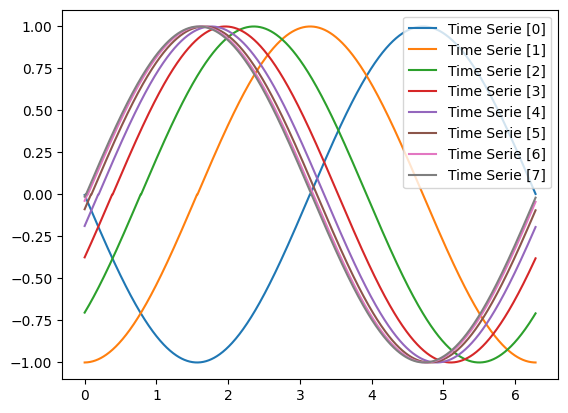

In [3]:
tmsg.plot_time_series(time_series=time_series)

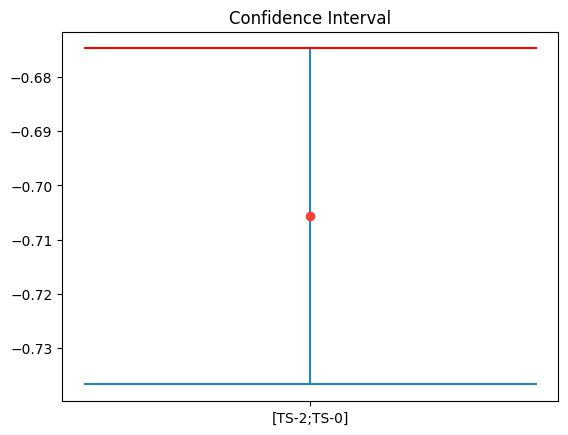

In [28]:
ci_95 = st.pearsonr(time_series[2].real, time_series[0].real).confidence_interval(confidence_level=0.95)
horizontal_line_width = 0.25
left = 1 - horizontal_line_width / 2
right = 1 + horizontal_line_width / 2

plt.title('Confidence Interval')
plt.xticks([1, 2, 3, 4], ['[TS-2;TS-0]', 'BF', 'FFD', 'BFD'])
plt.plot([1,1], [ci_95.high ,ci_95.low], color='#2187bb')
plt.plot([left, right], [ci_95.high, ci_95.high], color='red')
plt.plot([left, right], [ci_95.low, ci_95.low], color='#2187bb')
plt.plot(1, (ci_95.high+ci_95.low)/2, 'o', color='#f44336')
plt.show()
